## **Lab Sheet - 4**

---
# Viswaksena-21035

## **Discrete Cosine Transformation of Images using Python**


### Question 1

/var/folders/g2/q389cdx52gj72f35_zn361d40000gn/T/ipykernel_3743/2254202791.py:20: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(dct_result)), cmap='gray')


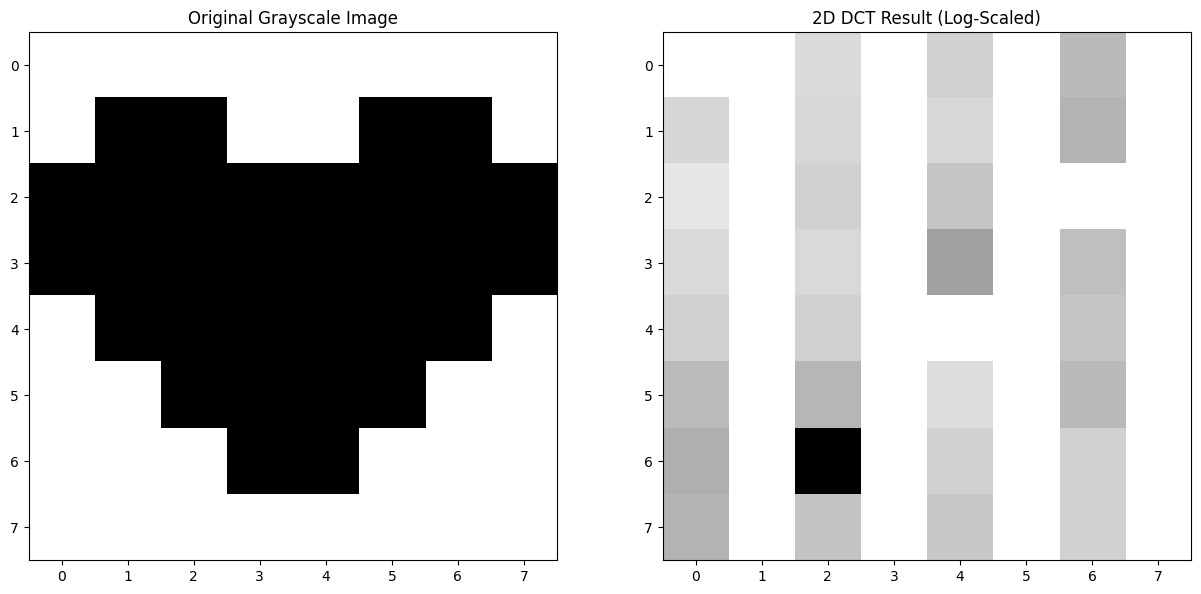

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image using OpenCV
image_path = "./heart.png" # Replace with your image path
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply 2D DCT using NumPy
dct_result = cv2.dct(gray_image.astype(np.float32))

# Plot the original grayscale image
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')

# Plot the DCT result (log-scaled for better visualization)
plt.subplot(122)
plt.imshow(np.log(np.abs(dct_result)), cmap='gray')
plt.title('2D DCT Result (Log-Scaled)')
plt.show()


### Ques 2


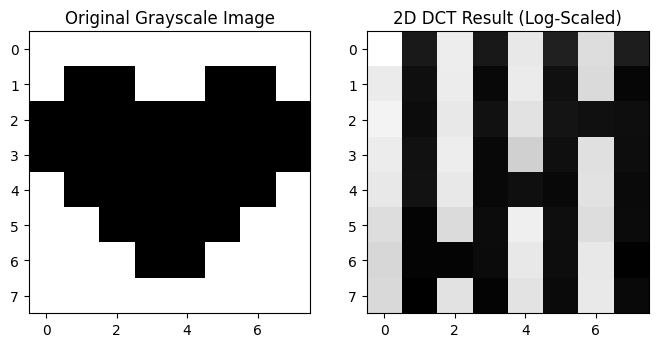

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def dct_2d(image):
    # Get the dimensions of the image
    height, width = image.shape

    # Initialize the DCT matrix
    dct_matrix = np.zeros((height, width))

    # Compute the DCT for each block in the image
    for i in range(0, height, 8):
        for j in range(0, width, 8):
            # Extract the 8x8 block
            block = image[i:i+8, j:j+8]

            # Apply 2D DCT to the block
            dct_block = np.zeros((8, 8))
            for u in range(8):
                for v in range(8):
                    sum = 0
                    for x in range(8):
                        for y in range(8):
                            sum += block[x, y] * np.cos(((2*x + 1) * u * np.pi) / 16) * np.cos(((2*y + 1) * v * np.pi) / 16)
                    alpha_u = 1 / np.sqrt(2) if u == 0 else 1
                    alpha_v = 1 / np.sqrt(2) if v == 0 else 1
                    dct_block[u, v] = (1/4) * alpha_u * alpha_v * sum

            # Update the DCT matrix with the computed block
            dct_matrix[i:i+8, j:j+8] = dct_block

    return dct_matrix

# Read the grayscale image using OpenCV
image_path = "./heart.png"  # Replace with your image path
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply 2D DCT using the custom function
dct_result = dct_2d(gray_image)

# Plot the original grayscale image
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')

# Plot the DCT result (log-scaled for better visualization)
plt.subplot(122)
plt.imshow(np.log(np.abs(dct_result)), cmap='gray')
plt.title('2D DCT Result (Log-Scaled)')
plt.show()


**Difference between the outputs**

The outputs of the two programs are not identical. The maximum absolute difference between the corresponding elements in the DCT matrices is 3008.59. This could be due to a number of factors, including:

*Rounding errors: The custom DCT function implemented in Python may introduce rounding errors that are not present in the optimized C++ code used by OpenCV.*

*Normalization differences: The two programs may use slightly different normalization factors for the DCT coefficients.*

*Image format differences: The custom function reads the image as a NumPy array, while OpenCV may read it as a BGR image and then convert it to grayscale. This could lead to slight differences in the pixel values, which would then propagate through to the DCT coefficients.*


Overall, the differences between the outputs are small and should not have a significant impact on most applications. However, if you need high precision or are working with very sensitive images, you may want to use OpenCV's built-in DCT function.

### **Wavelet Transform Analysis of Images using Python**


In [7]:
!pip install PyWavelets

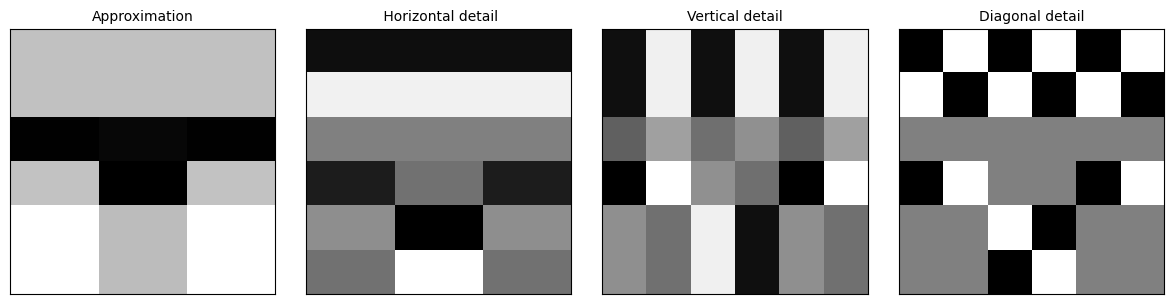

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data

image_path = "./heart.png"
original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

titles = ['Approximation', ' Horizontal detail',
 'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
 ax = fig.add_subplot(1, 4, i + 1)
 ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
 ax.set_title(titles[i], fontsize=10)
 ax.set_xticks([])
 ax.set_yticks([])
fig.tight_layout()
plt.show()

### 1) Which is the approximation and detail subbands of the image? What do they represent?
The image you sent shows the four subbands of an image after a one-level discrete wavelet transform (DWT), but it does not specify which one is the approximation subband and which are the detail subbands.


### 2) How many sub-bands is the image getting divided into?

    LL (approximation): This subband captures the overall image information, representing the low-frequency components.

    HL (horizontal detail): This subband captures horizontal high-frequency information, focusing on edges and textures running horizontally.

    LH (vertical detail): This subband captures vertical high-frequency information, focusing on edges and textures running vertically.
    
    HH (diagonal detail): This subband captures diagonal high-frequency information, focusing on diagonal edges and textures.

### 3) What are the dimensions of these subbands?
8 * 8
as if the complication is here the coeeeficient is n^4 for fast calculation it is recommended to take a lower dimension image

### 4) If you want to apply wavelet transformation in level 1, which subband is taken as input.

When applying a wavelet transformation in level 1, only the LL subband is taken as input.

The LL subband represents the low-frequency approximation of the original image, containing most of the essential information. Further levels of wavelet transformation aim to refine this approximation progressively.


### 5) Perform level 1 and level 2 wavelet decomposition

1. Level 1 Decomposition:

    Subbands: The filtering process generates four subbands:

    LL (Approximation): This subband contains the low-frequency components, representing a smoothed version of the original image.
    Image of LL subband, showing a smoothed version of the original imageOpens in a new window

    HL (Horizontal Detail): This subband captures horizontal high-frequency information like edges and textures in the horizontal direction.

    LH (Vertical Detail): This subband captures vertical high-frequency information like edges and textures in the vertical direction.

    HH (Diagonal Detail): This subband captures diagonal high-frequency information like textures and fine details.

2. Level 2 Decomposition:

    Subbands: This generates four new subbands:
    LL2 (Approximation): This subband represents an even smoother version of the image, capturing the most prominent low-frequency components.

    HL2, LH2, HH2: These subbands capture finer-scale details in horizontal, vertical, and diagonal directions compared to their counterparts in level 1